#Exploratory Data Analysis

## Load Data

In [2]:
# Load important package
import json  
import re
from collections import Counter
import time
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

SEED = 42


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load datasets 
df_path = '/content/drive/My Drive/Data Mining Project/data/df_merge.csv'
df = pd.read_csv(df_path, lineterminator = '\n')
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country,views_cat,publish_day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,publish_date,publish_hour,days_to_trending,title_char_length,title_word_count,title_allcap,title_question,tag_nums,desc_url,desc_emoji,desc_number,desc_char_length,desc_word_count,desc,tokenize,stemming,lemmatized,bp,competence,excitement,ruggedness,sincerity,sophistication,like_dislike_ratio,like_view_ratio,dislike_view_ratio,comment_view_ratio,neg,neu,pos,compound
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA,1,Friday,1,0,0,0,0,0,0,2017-11-10,17,4,42,8,0,0,6,1,0,1,594.0,34.0,eminems new track walk on water ft beyoncé is ...,"['eminems', 'new', 'track', 'walk', 'water', '...","['eminem', 'new', 'track', 'walk', 'water', 'f...","['eminem', 'new', 'track', 'walk', 'water', 'f...",{'excitement'},0,1,0,0,0,18.135076,0.045891,0.002531,0.007336,0.0,1.0,0.0,0.0000
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA,0,Monday,0,1,0,0,0,0,0,2017-11-13,17,1,29,6,1,0,11,1,0,1,704.0,61.0,still got a lot of packages probably will last...,"['still', 'got', 'lot', 'packages', 'probably'...","['still', 'got', 'lot', 'packag', 'probabl', '...","['still', 'got', 'lot', 'packag', 'probabl', '...",{'competence'},1,0,0,0,0,75.707346,0.125949,0.001664,0.012842,0.0,1.0,0.0,0.0000
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA,1,Sunday,0,0,0,1,0,0,0,2017-11-12,19,2,53,10,0,0,23,1,0,1,1177.0,74.0,watch my previous video subscribe for watch...,"['watch', 'previous', 'video', 'subscribe', 'w...","['watch', 'previou', 'video', 'subscrib', 'wat...","['watch', 'previou', 'video', 'subscrib', 'wat...",set(),0,0,0,0,0,27.352500,0.045758,0.001673,0.002563,0.2,0.8,0.0,-0.6124
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA,1,Sunday,0,0,0,1,0,0,0,2017-11-12,18,2,24,5,1,1,14,1,0,1,636.0,53.0,i know its been a while since we did this show...,"['know', 'since', 'show', 'back', 'might', 'be...","['know', 'sinc', 'show', 'back', 'might', 'bes...","['know', 'sinc', 'show', 'back', 'might', 'bes...","{'competence', 'excitement', 'sincerity'}",1,1,0,1,0,66.485168,0.063096,0.000949,0.008359,0.0,1.0,0.0,0.0000
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA,1,Thursday,0,0,0,0,1,0,0,2017-11-09,11,5,43,7,0,0,10,1,0,1,1250.0,118.0,to eds channel ed onfacebook website jaso...,"['eds', 'channel', 'ed', 'onfacebook', 'websit...","['ed', 'channel', 'ed', 'onfacebook', 'websit'...","['ed', 'channel', 'ed', 'onfacebook', 'websit'...",{'excitement'},0,1,0,0,0,77.513044,0.048746,0.000629,0.002538,0.0,1.0,0.0,0.0000


In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'country',
       'views_cat', 'publish_day_of_Week', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'publish_date',
       'publish_hour', 'days_to_trending', 'title_char_length',
       'title_word_count', 'title_allcap', 'title_question', 'tag_nums',
       'desc_url', 'desc_emoji', 'desc_number', 'desc_char_length',
       'desc_word_count', 'desc', 'tokenize', 'stemming', 'lemmatized', 'bp',
       'competence', 'excitement', 'ruggedness', 'sincerity', 'sophistication',
       'like_dislike_ratio', 'like_view_ratio', 'dislike_view_ratio',
       'comment_view_ratio', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

## Important visualizations

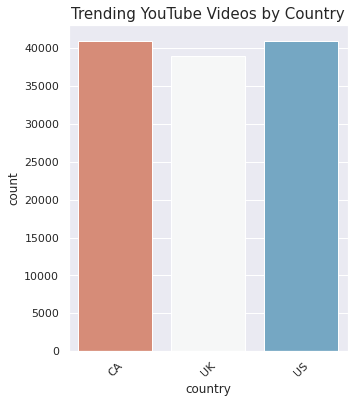

In [7]:
# Visualize the number of trending videos by Country
fig, ax = plt.subplots(figsize=(5, 6))

count = sns.countplot(data = df, x = 'country', palette = 'RdBu')
count.set_xticklabels(count.get_xticklabels(), rotation = 45)
count.set_title('Trending YouTube Videos by Country', fontsize = 15)
plt.show()

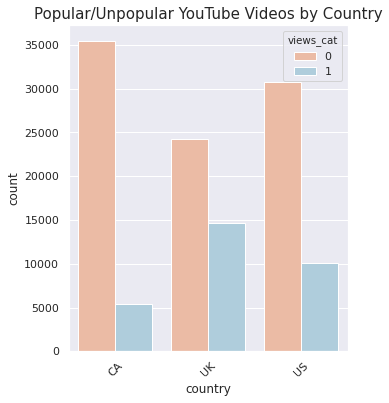

In [8]:
# Visualize the number of popular and unpopular trending videos by category
fig, ax = plt.subplots(figsize=(5, 6))

count = sns.countplot(data = df, x = 'country', hue = 'views_cat', palette = 'RdBu')
count.set_xticklabels(count.get_xticklabels(), rotation = 45)
count.set_title('Popular/Unpopular YouTube Videos by Country', fontsize = 15)
plt.show()

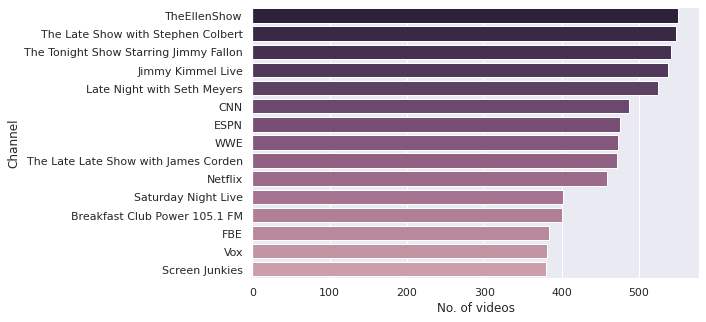

In [9]:
# Which channels have the largest number of trending videos?
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(8,5))
_ = sns.barplot(x="video_count", y="channel_title",data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

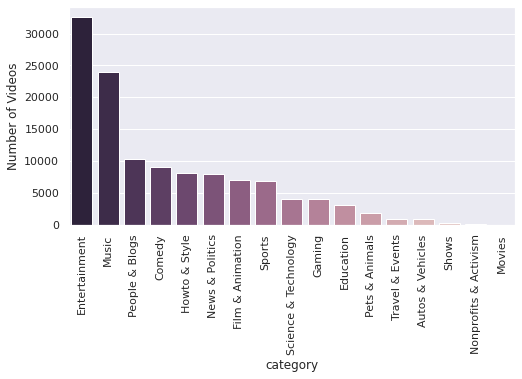

In [10]:
# which category had the largest number of trending videos？
cdf = df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": 'Number of Videos'}, inplace=True)
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.barplot(x="category", y="Number of Videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="category", ylabel="Number of Videos")

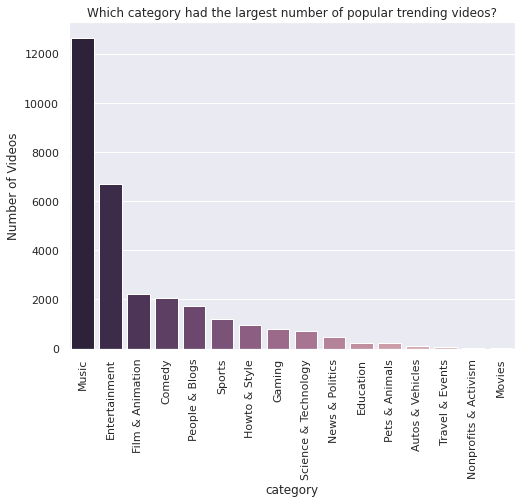

In [11]:
# which category had the largest number of popular trending videos？
cdf = df[df.views_cat==1]["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": 'Number of Videos'}, inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(x="category", y="Number of Videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="category", ylabel="Number of Videos")
_ = ax.set_title('Which category had the largest number of popular trending videos?')

In [12]:
df[df.views_cat==1]["category"].value_counts()

Music                    12636
Entertainment             6686
Film & Animation          2230
Comedy                    2054
People & Blogs            1751
Sports                    1212
Howto & Style              974
Gaming                     776
Science & Technology       728
News & Politics            480
Education                  225
Pets & Animals             206
Autos & Vehicles           106
Travel & Events             59
Nonprofits & Activism        9
Movies                       4
Name: category, dtype: int64

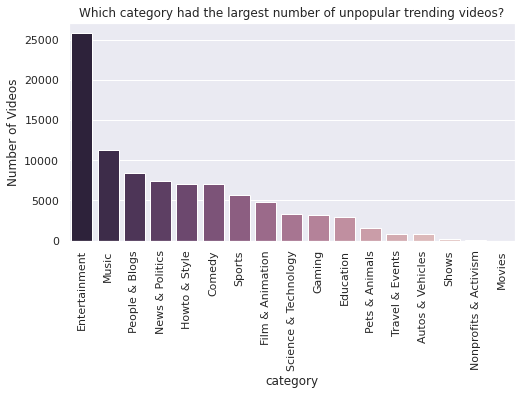

In [13]:
# which category had the largest number of unpopular trending videos？
cdf = df[df.views_cat==0]["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": 'Number of Videos'}, inplace=True)
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.barplot(x="category", y="Number of Videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="category", ylabel="Number of Videos")
_ = ax.set_title('Which category had the largest number of unpopular trending videos?')

In [14]:
df[df.views_cat==0]["category"].value_counts()

Entertainment            25853
Music                    11321
People & Blogs            8490
News & Politics           7391
Howto & Style             7107
Comedy                    7004
Sports                    5656
Film & Animation          4752
Science & Technology      3346
Gaming                    3173
Education                 2879
Pets & Animals            1617
Travel & Events            831
Autos & Vehicles           775
Shows                      201
Nonprofits & Activism       48
Movies                       2
Name: category, dtype: int64

## Visualize Publish Time

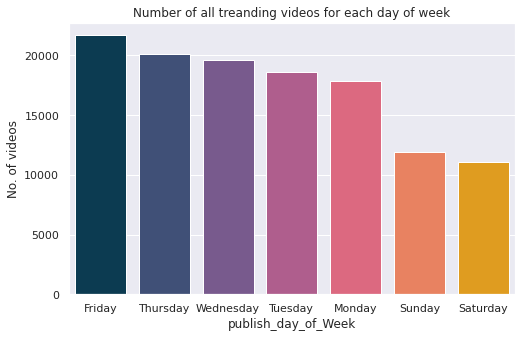

In [15]:
# visualize publish day_of_week

#df.drop(labels='publish_time', axis=1, inplace=True)

cdf = df["publish_day_of_Week"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publish_day_of_Week", "publish_day_of_Week": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="publish_day_of_Week", y="No_of_videos", data=cdf,
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="publish_day_of_Week", ylabel="No. of videos")
_ = ax.set_title('Number of all treanding videos for each day of week')
fig.set_size_inches(8, 5)

In [16]:
# Calculate the ratio of popular videos for each day of week
pdf=df[df.views_cat==1]
popular_ratio = pdf.groupby('publish_day_of_Week')['views_cat'].agg('sum') / df.groupby('publish_day_of_Week')['views_cat'].agg('count')
popular_ratio

publish_day_of_Week
Friday       0.299242
Monday       0.219649
Saturday     0.193680
Sunday       0.245798
Thursday     0.287864
Tuesday      0.244154
Wednesday    0.224403
Name: views_cat, dtype: float64

Text(0.5, 1.0, 'Ratio of Popular Videos for Each Day of Week')

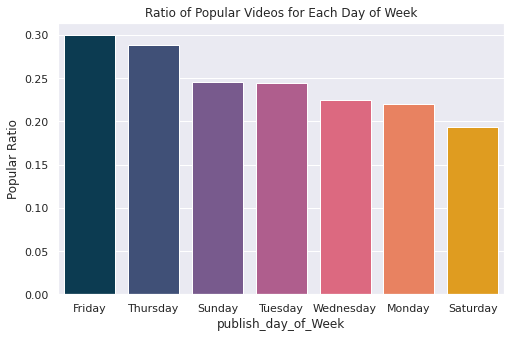

In [17]:
#Visualize ratio of popular videos by each day_of_week
popular_ratio = popular_ratio.sort_values(ascending=False).reset_index()
popular_ratio.columns = ['publish_day_of_Week','Popular Ratio']
plt.subplots(figsize=(8, 5))
sns.barplot(x="publish_day_of_Week", y="Popular Ratio", data=popular_ratio,
            label="Popular Ratio",  palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7))
plt.title('Ratio of Popular Videos for Each Day of Week')

Text(0.5, 1.0, 'Number of Videos for Each Hour')

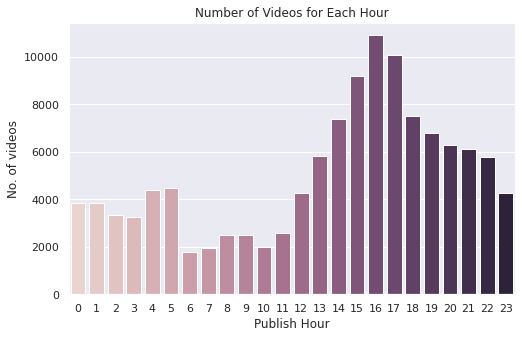

In [18]:
# visualize publish hour for all trending videos
cdf = df["publish_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publish_hour", "publish_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publish_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publish Hour", ylabel="No. of videos")
fig.set_size_inches(8, 5)
plt.title('Number of Videos for Each Hour')

Text(0.5, 1.0, 'Ratio of Popular Videos for Each Hour')

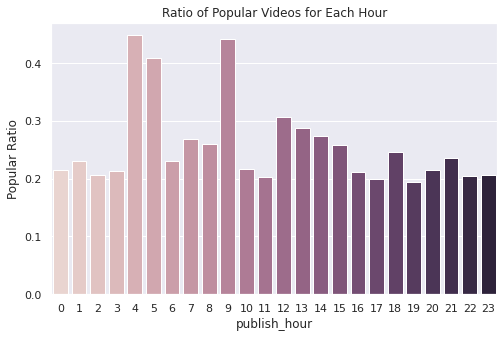

In [19]:
# visualize publish hour for all popular videos
popular_ratio = pdf.groupby('publish_hour')['views_cat'].agg('sum') / df.groupby('publish_hour')['views_cat'].agg('count')
popular_ratio

popular_ratio = popular_ratio.sort_values(ascending=False).reset_index()
popular_ratio.columns = ['publish_hour','Popular Ratio']
plt.subplots(figsize=(8, 5))
sns.barplot(x="publish_hour", y="Popular Ratio", data=popular_ratio,
            label="Popular Ratio",  palette=sns.cubehelix_palette(n_colors=24))
plt.title('Ratio of Popular Videos for Each Hour')

## Visualize Category Virables

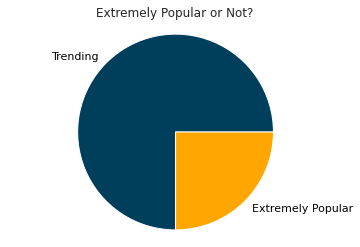

In [20]:
# visualize views_cat
# Visualize that we identify top 25% videos with most views as popular
value_counts = df["views_cat"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[0], value_counts[1]], labels=['Trending', 'Extremely Popular'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Extremely Popular or Not?')

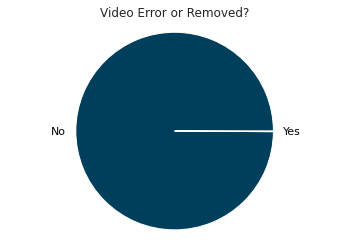

In [21]:
# visualize publish day_of_week
# Draw a pie chart to see if the Video has "Error or Removed" or not
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [22]:
df["video_error_or_removed"].value_counts()

False    120627
True        119
Name: video_error_or_removed, dtype: int64

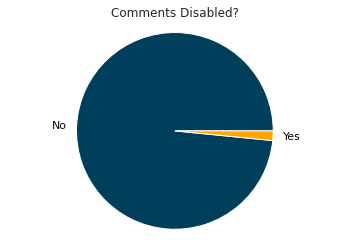

In [23]:

# Draw a pie chart to see if the Video Comments is Disabled or not
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')


In [24]:
df["comments_disabled"].value_counts()

False    118847
True       1899
Name: comments_disabled, dtype: int64

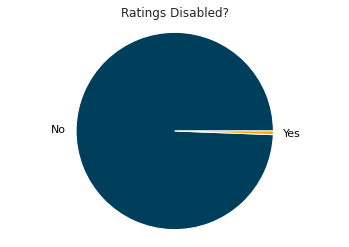

In [25]:
# Draw a pie chart to see if the Video Ratings is Disabled or not
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [26]:
df["ratings_disabled"].value_counts()

False    120026
True        720
Name: ratings_disabled, dtype: int64

## Visualize features realted to titles

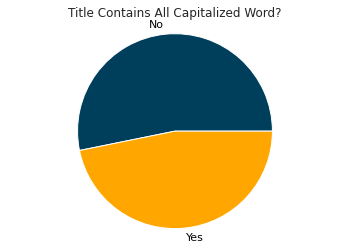

In [27]:
# Draw a pie chart to see if the title contains capitalized words
cap_count = df.title_allcap.value_counts().to_dict()
plt.pie([cap_count[False], cap_count[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plt.axis('equal')
plt.title('Title Contains All Capitalized Word?')
plt.show()

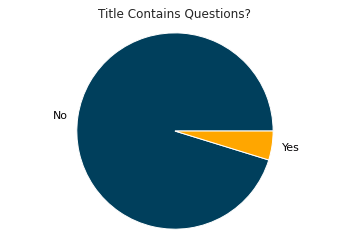

In [28]:
# Draw a pie chart to see if the title contains questions mark
question_count = df.title_question.value_counts().to_dict()
plt.pie([question_count[False], question_count[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plt.axis('equal')
plt.title('Title Contains Questions?')
plt.show()

## Visualize features realted to descriptions

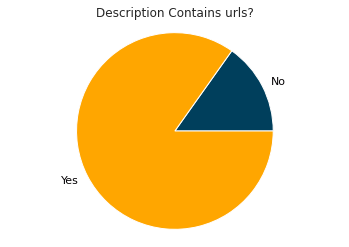

In [29]:
# Draw a pie chart to see if the description contains urls
url_count = df.desc_url.value_counts().to_dict()
plt.pie([url_count[False], url_count[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plt.axis('equal')
plt.title('Description Contains urls?')
plt.show()

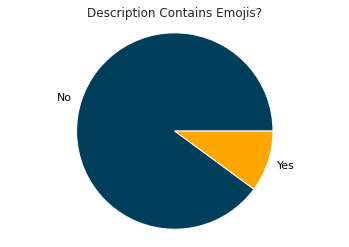

In [30]:
# Draw a pie chart to see if the description contains Emojis
emoji_count = df.desc_emoji.value_counts().to_dict()
plt.pie([emoji_count[False], emoji_count[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plt.axis('equal')
plt.title('Description Contains Emojis?')
plt.show()

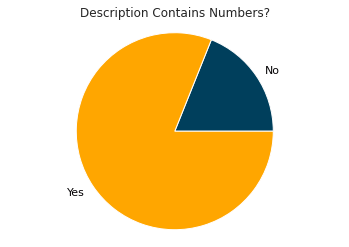

In [31]:
# Draw a pie chart to see if the description contains numbers
num_count = df.desc_number.value_counts().to_dict()
plt.pie([num_count[False], num_count[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plt.axis('equal')
plt.title('Description Contains Numbers?')
plt.show()

## Distribution plots of title, tag and description

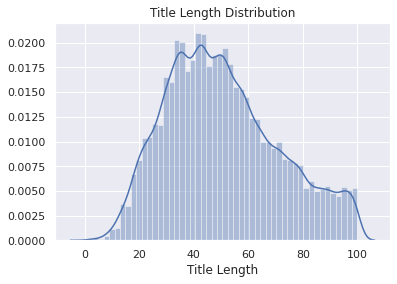

In [32]:
# Draw the distribution plot of title length
sns.distplot(df.title_char_length)
plt.xlabel('Title Length')
plt.title('Title Length Distribution')
plt.show()

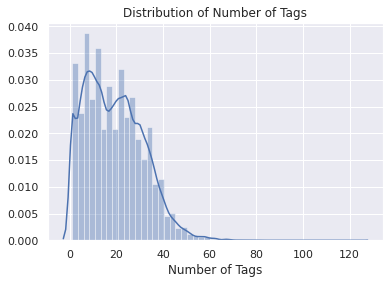

In [33]:
# Draw the distribution plot of number of tags
sns.distplot(df.tag_nums)
plt.xlabel('Number of Tags')
plt.title('Distribution of Number of Tags')
plt.show()

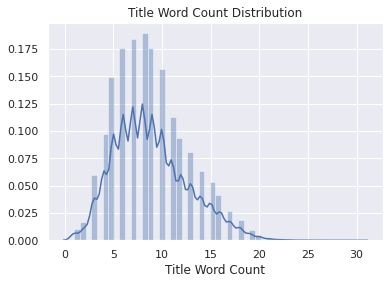

In [34]:
# Draw the distribution plot of number of words in title
sns.distplot(df.title_word_count)
plt.xlabel('Title Word Count')
plt.title('Title Word Count Distribution')
plt.show()

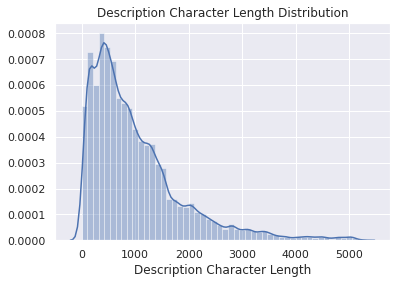

In [35]:
# Draw the distribution plot of number of words in description
sns.distplot(df.desc_char_length)
plt.xlabel('Description Character Length')
plt.title('Description Character Length Distribution')
plt.show()

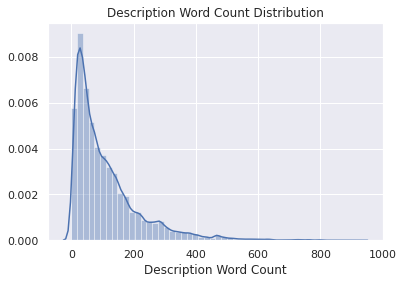

In [36]:
# Draw the distribution plot of number of words in description
sns.distplot(df.desc_word_count)
plt.xlabel('Description Word Count')
plt.title('Description Word Count Distribution')
plt.show()

## Visualize views, likes, dislikes and comments ratios by category

Text(0.5, 1.0, 'Like-Dislikes Ratio by categories for all trending videos')

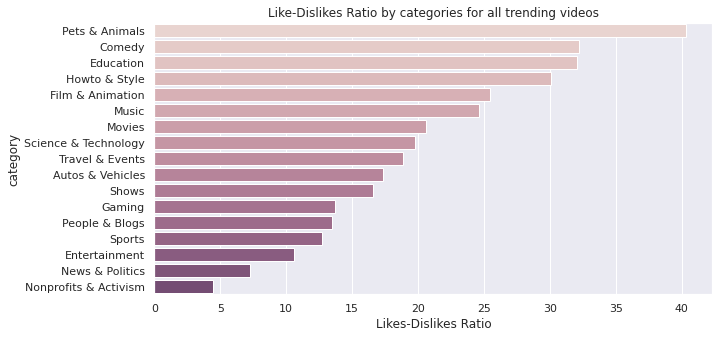

In [37]:
# Draw a bar graph of Like-Dislike Ratio by Category
like_dislike_ratio = df.groupby('category')['likes'].agg('sum') / df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','Likes-Dislikes Ratio']
plt.subplots(figsize=(10, 5))
sns.barplot(x="Likes-Dislikes Ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", palette=sns.cubehelix_palette(n_colors=24))
plt.title('Like-Dislikes Ratio by categories for all trending videos')

Text(0.5, 1.0, 'Like-Dislikes Ratio by categories for all videos')

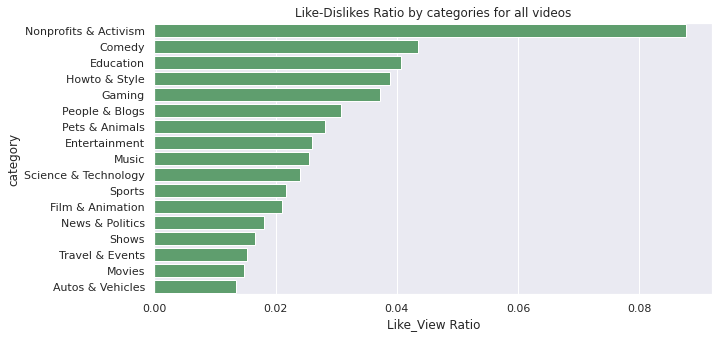

In [38]:
# Draw a bar graph of Like-View Ratio by Category
like_view_ratio = df.groupby('category')['likes'].agg('sum') / df.groupby('category')['views'].agg('sum')
like_view_ratio  = like_view_ratio.sort_values(ascending=False).reset_index()
like_view_ratio.columns = ['category','Like_View Ratio']
plt.subplots(figsize=(10,5))
sns.barplot(x="Like_View Ratio", y="category", data=like_view_ratio,
            label="Like_View Ratio", color="g")
plt.title('Like-Dislikes Ratio by categories for all videos')

Text(0.5, 1.0, 'Dislike-View Ratio by Category for all trending videos')

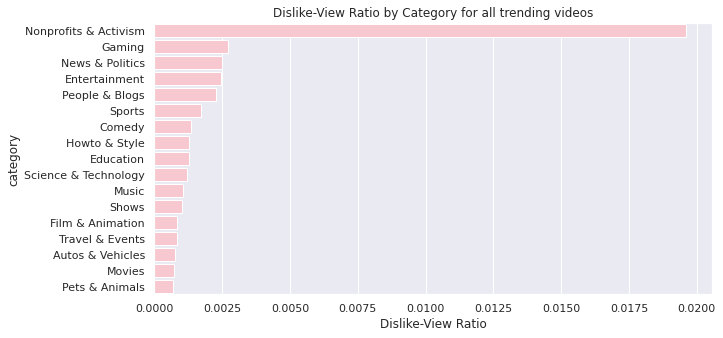

In [39]:
# Draw a bar graph of Dislike-View Ratio by Category for all trending videos
dislike_view_ratio = df.groupby('category')['dislikes'].agg('sum') / df.groupby('category')['views'].agg('sum')
dislike_view_ratio  = dislike_view_ratio.sort_values(ascending=False).reset_index()
dislike_view_ratio.columns = ['category','Dislike-View Ratio']
plt.subplots(figsize=(10, 5))
sns.barplot(x="Dislike-View Ratio", y="category", data=dislike_view_ratio,
            label="Dislike-View Ratio", color="pink")
plt.title('Dislike-View Ratio by Category for all trending videos')

Text(0.5, 1.0, 'Comment-View Ratio by Category for all trending videos')

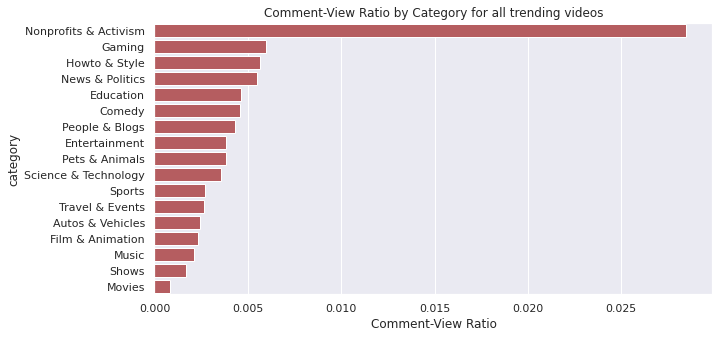

In [40]:
# Draw a bar graph of Comment-View Ratio by Category
views_comment_ratio = df.groupby('category')['comment_count'].agg('sum') / df.groupby('category')['views'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','Comment-View Ratio']
plt.subplots(figsize=(10, 5))
sns.barplot(x="Comment-View Ratio", y="category", data=views_comment_ratio,
            label="Comment-View Ratio", color="r")
plt.title('Comment-View Ratio by Category for all trending videos')

In [41]:
# To see which videos are in Nonprofits & Activism category
ddf = df[df.views_cat==1]
ndf = ddf[df.category=='Nonprofits & Activism']
ndf["title"].value_counts()

Suicide: Be Here Tomorrow.                                            8
Яхты, олигархи, девочки: охотница на мужчин разоблачает взяточника    1
Name: title, dtype: int64

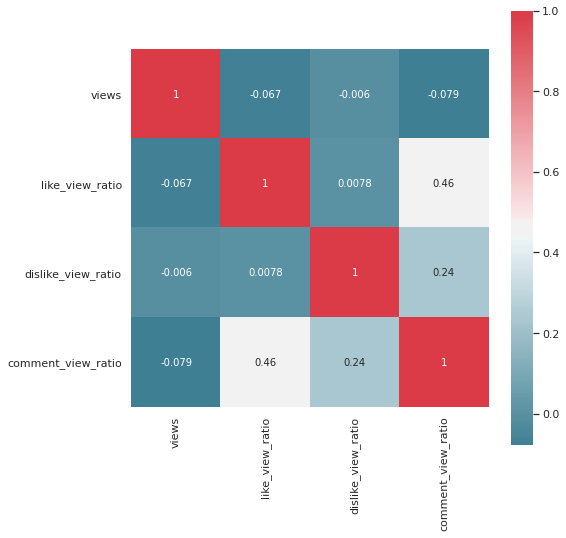

In [42]:
# Draw a correlation matrix of views, like_view_ratio, dislike_view_ratio, and comment_view_ratio
ratio_cols = ['views', 'like_view_ratio', 'dislike_view_ratio', 'comment_view_ratio']

plt.figure(figsize=(8, 8))

corr = df[ratio_cols].corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, annot = True)

plt.show()

## Additional Visualizations

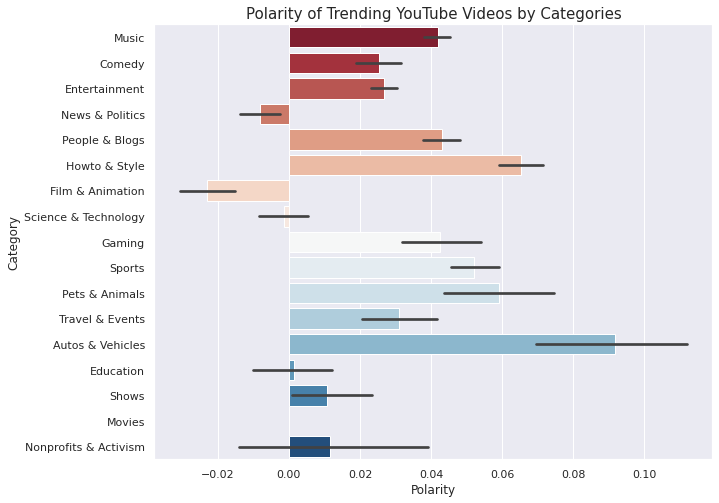

In [43]:
# sentiment analysis by category
plt.figure(figsize = (10, 8))

sns.barplot(x = 'compound', y = 'category', data = df, orient = 'h', palette = 'RdBu')
plt.xlabel('Polarity')
plt.ylabel('Category')
plt.title('Polarity of Trending YouTube Videos by Categories', fontsize = 15)

plt.show()

In [0]:
def cat_wordcloud(cat):
    tags = " ".join(tag for tag in df.loc[df.category == cat, 'tags'])
    
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stop_words,background_color="white",width=1200, height=500,  
                         colormap="tab20b").generate(tags)

    # Display the generated image:
    # the matplotlib way:

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear') 
    _ = plt.axis("off")

    plt.show()

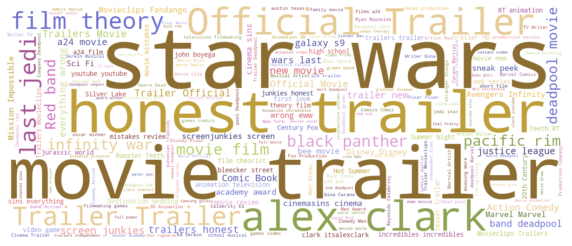

In [45]:
# Generate a wordcloud for Film & Animation
cat_wordcloud('Film & Animation')

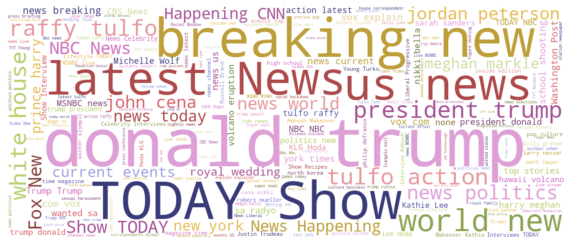

In [46]:
# Generate a wordcloud for News & Politics
cat_wordcloud('News & Politics')

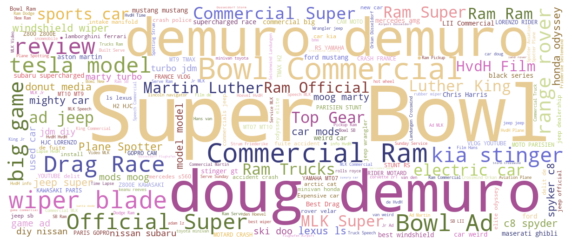

In [47]:
# Generate a wordcloud forAutos & Vehicles
cat_wordcloud('Autos & Vehicles')

In [0]:
# Visualize brand personality by countries
bp_country = df.groupby('country').sum()
#bp_country.reset_index(inplace=True)
df_bp = bp_country.iloc[:,28:33]

In [49]:
bp_country.head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,views_cat,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,publish_hour,days_to_trending,title_char_length,title_word_count,title_allcap,title_question,tag_nums,desc_url,desc_emoji,desc_number,desc_char_length,desc_word_count,competence,excitement,ruggedness,sincerity,sophistication,like_dislike_ratio,like_view_ratio,dislike_view_ratio,comment_view_ratio,neg,neu,pos,compound
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA,850143,46891975069,1618179878,82137919,206161849,583.0,279.0,27.0,5398,7012,5876,5249,5406,5956,5865,5517,564594,142327,2195688,381627,20207,2164,800372,33511,5306,33638,41216923.0,4482590.0,13291,17558,9075,17005,10541,inf,1365.911260,54.118638,230.187231,1013.637,38509.715,1357.618,941.9351
UK,654876,230069198174,5234962944,296250384,509346351,683.0,272.0,69.0,14650,7634,5821,2202,2815,7159,5952,7333,503421,1430666,1928279,340307,18326,1164,700439,33095,3207,30708,34351283.0,3886587.0,11758,16962,7182,15009,11527,inf,1313.801303,63.096026,165.934449,1066.025,36417.317,1432.667,727.4336
US,817851,96671770152,3041147198,151978155,345888164,633.0,169.0,23.0,10139,7002,6177,3593,3679,6950,6786,6762,563732,688370,1989228,348847,18000,2424,808183,35822,3661,33525,42238116.0,4727955.0,15525,21270,10658,18794,13935,inf,1409.176984,66.097972,182.348928,908.675,38410.786,1629.625,1920.8609


In [50]:
df_bp

,competence,excitement,ruggedness,sincerity,sophistication
country,,,,,
CA,13291,17558,9075,17005,10541
UK,11758,16962,7182,15009,11527
US,15525,21270,10658,18794,13935


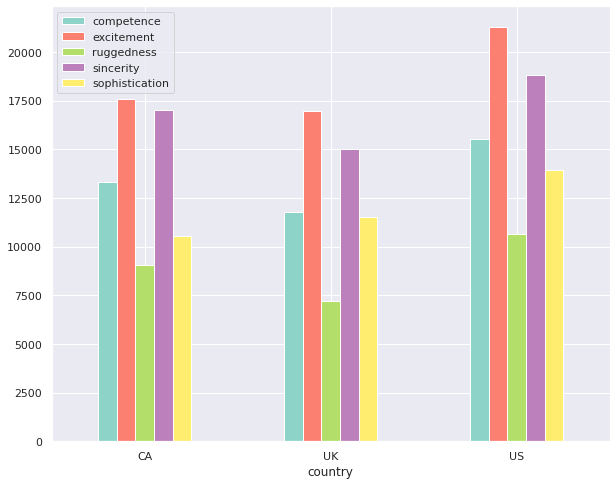

In [51]:
#Draw a bar plot of brand personality of 3 countries
ax = df_bp.plot.bar(rot=0,colormap = 'Set3', figsize=(10,8))

## Target variable: views_cat

In [52]:
# Load datasets 
import pandas as pd
df_clean_path = '/content/drive/My Drive/Data Mining Project/data/df_clean.csv'
df_clean = pd.read_csv(df_clean_path, lineterminator = '\n')
df_clean = df_clean.drop('Unnamed: 0', axis=1)
df_clean.head()

,comments_disabled,ratings_disabled,video_error_or_removed,views_cat,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,publish_hour,title_char_length,title_word_count,title_allcap,title_question,tag_nums,desc_url,desc_emoji,desc_number,desc_char_length,desc_word_count,competence,excitement,ruggedness,sincerity,sophistication,neg,neu,pos,compound,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,CA,UK,US
0,False,False,False,1,1,0,0,0,0,0,0,17,42,8,0,0,6,1,0,1,594.0,34.0,0,1,0,0,0,0.0,1.0,0.0,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,False,False,False,0,0,1,0,0,0,0,0,17,29,6,1,0,11,1,0,1,704.0,61.0,1,0,0,0,0,0.0,1.0,0.0,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,False,False,False,1,0,0,0,1,0,0,0,19,53,10,0,0,23,1,0,1,1177.0,74.0,0,0,0,0,0,0.2,0.8,0.0,-0.6124,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,False,False,False,1,0,0,0,1,0,0,0,18,24,5,1,1,14,1,0,1,636.0,53.0,1,1,0,1,0,0.0,1.0,0.0,0.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,False,False,False,1,0,0,0,0,1,0,0,11,43,7,0,0,10,1,0,1,1250.0,118.0,0,1,0,0,0,0.0,1.0,0.0,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
bp_up = df_clean.groupby('views_cat').sum()

In [0]:
bp_up0 = bp_up.iloc[:,21:26]

In [55]:
bp_up0.head()

,competence,excitement,ruggedness,sincerity,sophistication
views_cat,,,,,
0,30935,42082,21064,38331,26950
1,9639,13708,5851,12477,9053


In [56]:
bp_up0['total'] = bp_up0['competence']+bp_up0['excitement']+bp_up0['ruggedness']+bp_up0['sincerity']+bp_up0['sophistication']
bp_up0['competence'] = bp_up0['competence']/bp_up0['total']
bp_up0['excitement'] = bp_up0['excitement']/bp_up0['total']
bp_up0['ruggedness'] = bp_up0['ruggedness']/bp_up0['total']
bp_up0['sincerity'] = bp_up0['sincerity']/bp_up0['total']
bp_up0['sophistication'] = bp_up0['sophistication']/bp_up0['total']
bp_up0.head(3)

,competence,excitement,ruggedness,sincerity,sophistication,total
views_cat,,,,,,
0,0.194118,0.264065,0.132177,0.240528,0.169112,159362
1,0.190013,0.270226,0.115341,0.245959,0.178462,50728


In [0]:
bp_up2 = bp_up0.drop('total',axis=1)
bp_up2 = bp_up2.iloc[1:]

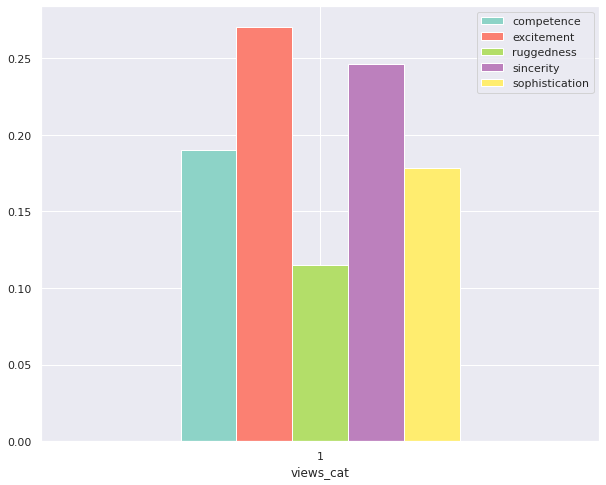

In [58]:
#Draw a bar plot of brand personality for popular videos (based on ratio)
ax = bp_up2.plot.bar(rot=0,colormap = 'Set3', figsize=(10,8))

In [0]:
# Pairplot of scores by view_cat 
score0 = df_clean.iloc[:,[3,27,28,29,30]]
sns.pairplot(score0,hue='views_cat',vars=['pos','neu','neg','compound'])

In [59]:
corr_matrix=df_clean.corr()
corr_matrix["views_cat"].sort_values(ascending=False)

views_cat                 1.000000
Music                     0.318765
UK                        0.201380
desc_url                  0.104155
Friday                    0.053147
Film & Animation          0.039698
Thursday                  0.039033
pos                       0.024228
video_error_or_removed    0.019657
compound                  0.015629
desc_number               0.013610
comments_disabled         0.007570
Movies                    0.006783
desc_word_count           0.004137
desc_char_length          0.002319
sophistication            0.002178
Sunday                   -0.003212
US                       -0.003976
tag_nums                 -0.004549
Nonprofits & Activism    -0.004623
Tuesday                  -0.005766
ratings_disabled         -0.008199
sincerity                -0.008725
excitement               -0.009197
neu                      -0.009859
desc_emoji               -0.010135
neg                      -0.013712
Comedy                   -0.015286
title_allcap        

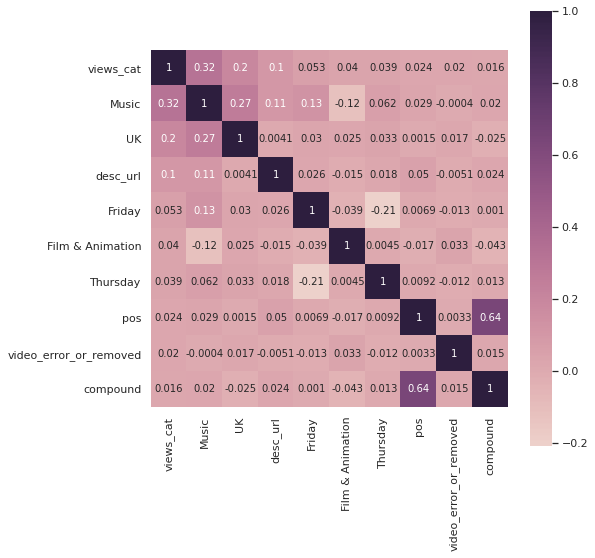

In [60]:
# Draw a correlation matrix of target variable "views_cat" and 10 featrues with highes correlation
corr_cols = ['views_cat','Music', 'UK', 'desc_url', 'Friday', 'Film & Animation','Thursday','pos','video_error_or_removed', 'compound' ]

plt.figure(figsize=(8, 8))

corr = df_clean[corr_cols].corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap=sns.cubehelix_palette(as_cmap=True),
            square = True, annot = True)

plt.show()